<a href="https://colab.research.google.com/github/dawsond-smu/Portfolio/blob/master/Iris_Data(Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Flower: Automatic Classification
####Iris is the family in the flower which contains the several species such as the iris.setosa, iris.versicolor, iris.virginica, etc. 

150 samples  
3 labels: species of Iris (Iris setosa, Iris virginica, & Iris versicolor)  
4 features: Sepal length, Sepal width, Petal length, & Petal Width in cm  

The purpose of this notebook is to try out a few algorithms for classification of the Iris Flower.    
Pre processing (scanling the data, basically) and then cover the following algorithms: Suport vector Classification (SVM), K-nn, XGBoost, Decision Tree and Random Forest.  
For each one, I will compute the model accuracy both for the test dataset. 

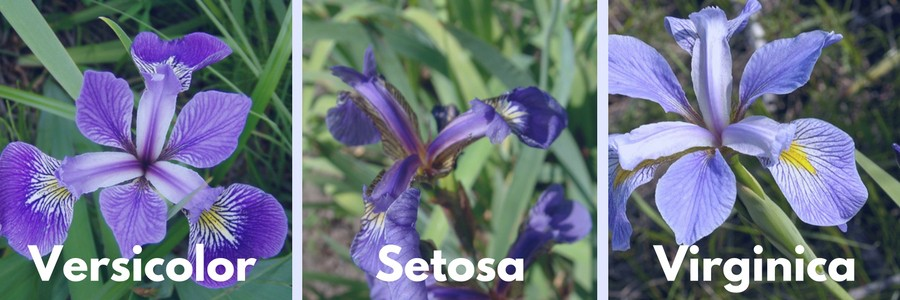

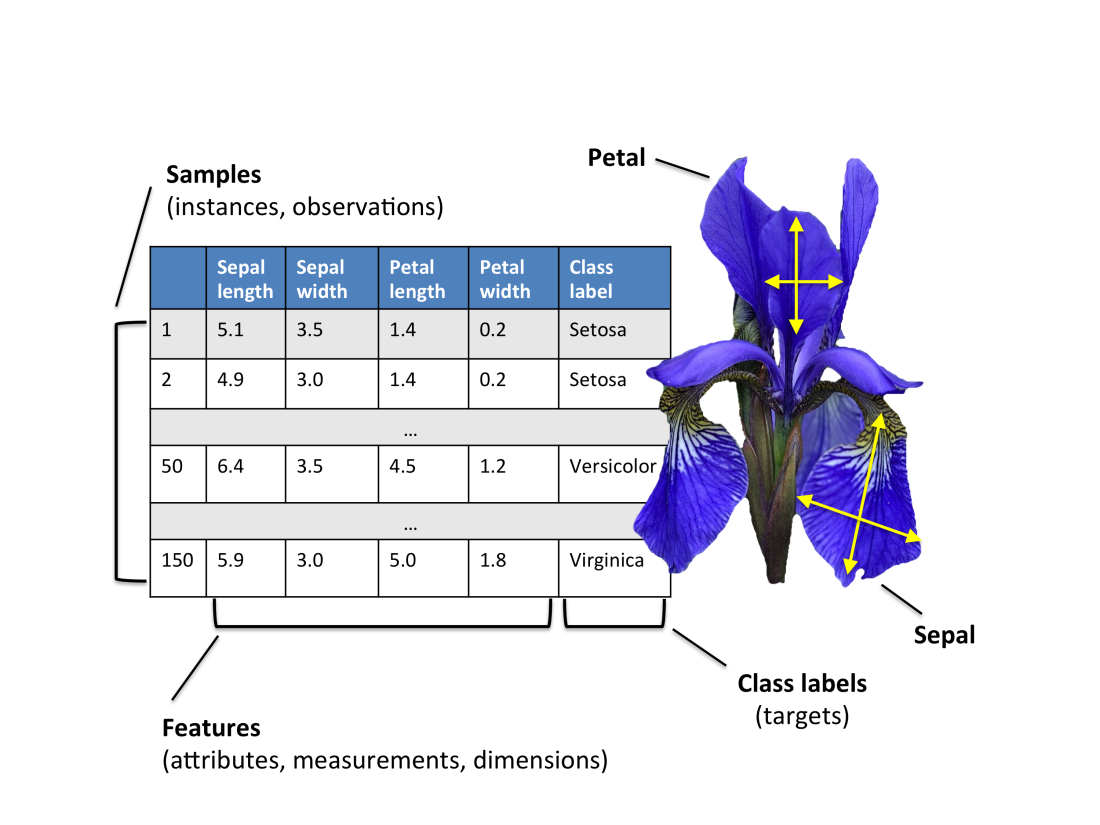

##Packages

In [74]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import  datasets, tree, neighbors
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

##Import Iris Data
3 target classification Groups: Setosa, Versicoler, & Virginica

In [26]:
iris=datasets.load_iris()
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

#Visualize Data
Note how there's some overlap, the model will aid in the classification

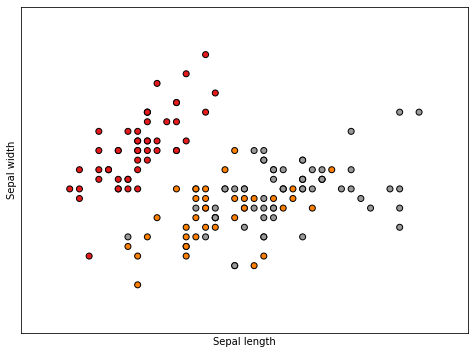

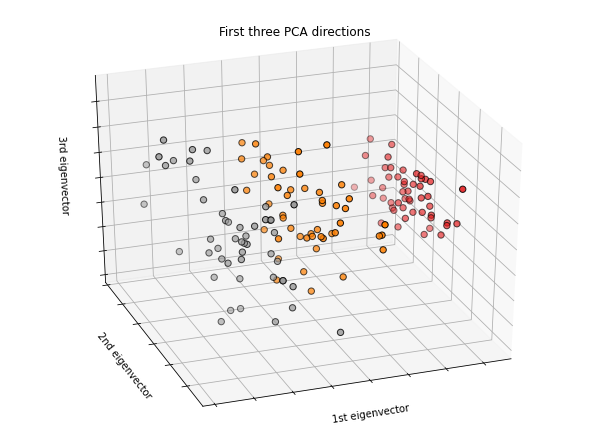

In [75]:
# import some data to play with
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

##Scale & Splitting the dataset  
Since our process involve training and testing, We should split our dataset.It can be executed by the following code avoiding unwanted bias.

In [50]:
sc = StandardScaler()
sc.fit(iris.data)
x=sc.transform(iris.data) 
y=iris.target
#Stratified Shuffle split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(iris.data, iris.target)
for train_index, test_index in sss.split(iris.data, iris.target):
  print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = iris.data[train_index], iris.data[test_index]
  y_train, y_test = iris.target[train_index], iris.target[test_index]

TRAIN: [ 16  69  15   4  78 138 111  10  93  45  74  58 106  22  56  28 107  27
  94  72  66  33 143  87  96 115  73  84  26 126  11  91 128 105  79  48
   7 148  31 119  59 124  38  57  95 101  83 137 112  52  92  30  63  42
  14 108 125 122 141  32 140  35  76  41   2  18 146 135 127 116  80  29
 104  82  34] TEST: [139  65 145   6 129  25  85  23 118  64  17 121  71  39  67  36 131 149
  24   0  89   8 136 110 132 147 117   9 130  75 134 144  97 114  19  43
  49  21  50  86  37  20  61  81   5 123  44  99  77 102  98   3 142  40
  88  60  12 103  53 109  90 133  70 100  13  47  54   1  51  68 113  62
 120  46  55]
TRAIN: [  7  10 141   6  94  31 113 140 108  11 128  96 149 110  98   4 101  44
   5   2 144 102 112  86  41  20  59 118 148 115  99 132  88  57 105 103
  83  45 138  62  74  81  52  13 114  67  40  47  82  33 106  38  18 135
  63  75  79  37  55  72  70 111  95 142  15  64 121  19  91  42  26 126
  12   1  69] TEST: [120  78  29  46  58 134 125  25  53  48  51 104 146 123

##Build, Train, & Predict The Model (Accuracy)
####K-Nearest Neighbor

In [57]:
#classifier=tree.DecisionTreeClassifier() *"Model Classifcation Accuracy is  94.67 %"
classifier=neighbors.KNeighborsClassifier()

classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
print('The accuracy of the K-Nearest Neighbor classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the K-Nearest Neighbor classifier on training data is  98.67 %


SVM - Support Vector Classifation

In [60]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
predictions=svm.predict(x_test)
print('The accuracy of the SVM classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the SVM classifier on training data is  96.0 %


XGBoost

In [64]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
predictions=xgb_clf.predict(x_test)
print('The accuracy of the XGBoost classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the XGBoost classifier on training data is  96.0 %


Decision Tree

In [65]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train, y_train)
predictions=decision_tree.predict(x_test)
print('The accuracy of the Decision Tree classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')


The accuracy of the Decision Tree classifier on training data is  94.67 %


Random Forest

In [68]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
predictions=random_forest.predict(x_test)
print('The accuracy of the Random Forest classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the Random Forest classifier on training data is  96.0 %


#Visualization of the Results

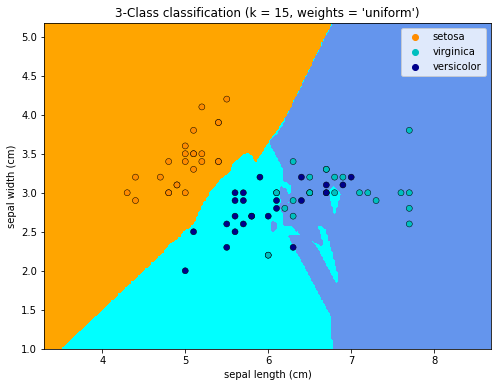

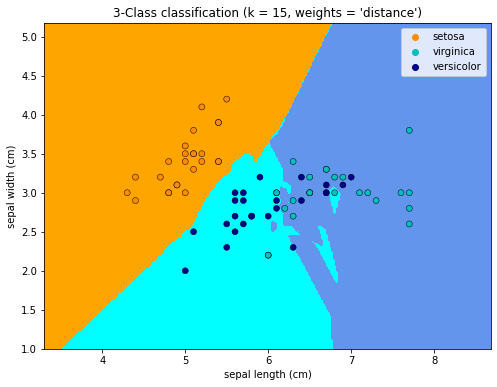

In [73]:
n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = x_test[:, :2]
y = y_test

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()